# Sales Analysis Using Online Electronic Store Data
## ----------------------------------------------------------------------------

In [3]:
import os
import pandas as pd

## 1) Import the data

In [4]:
#### List concatenation
files = [file for file in os.listdir('./Sales_Data') if not file.startswith('.')]
files

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [5]:
#### move data to data frame
data = pd.DataFrame()

####search and combines the data sets into one
for file in files:
    temp = pd.read_csv('./Sales_Data/' + file) # ./ Sales_data/Sales_December_2019.csv
    data = pd.concat([data,temp])
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


In [6]:
data.shape

(186850, 6)

In [7]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

## 2) Clean the Data
##### a) Drop NaN values from the data

In [8]:
data[data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
12567,NaN,NaN,NaN,NaN,NaN,NaN
12640,NaN,NaN,NaN,NaN,NaN,NaN
12659,NaN,NaN,NaN,NaN,NaN,NaN
12732,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Drops all null values
data = data.dropna(how = 'all')
data.shape

(186305, 6)

##### b) Clean tuples with column names as their entry

In [10]:
data = data[data['Order Date'] != 'Order Date']

##### c) Convert the columns to the correct data type

In [11]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

## 3) Augmentation of the data 
##### a) Add a month column with the numeric value of the month

In [12]:
data['Order Date'] = pd.to_datetime(data['Order Date']) 
data['Month'] = data['Order Date'].dt.month
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12


##### b) Add a city column with state notation

In [13]:
def getCity(address):
    return address.split(',')[1]
def getState(address):
    return address.split(',')[2].split(' ')[2]

data['City'] = data['Purchase Address'].apply(lambda x: getCity(x) + '(' + getState(x) + ')')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City(10001)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City(10001)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City(10001)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco(94016)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta(30301)
...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,Boston(02215)
13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,New York City(10001)
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,San Francisco(94016)
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,San Francisco(94016)


##### c) Add hours column

In [14]:
data['Hour'] = data['Order Date'].dt.hour
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City(10001),0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City(10001),7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City(10001),18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco(94016),15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta(30301),12


## 4) Explore the data!!
#### Qa) Find out the best month for sales and the total amount earned that month.

In [15]:
#First viewing, we need to categorize each month and find the total sales
#data.dtypes
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [16]:
resulta = data.groupby('Month')['Sales'].sum()
resulta

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

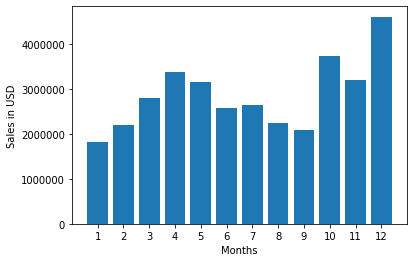

In [17]:
import matplotlib.pyplot as plt
months = data['Month'].unique()
months.sort()
plt.bar(months, resulta)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

##### Qb) Find out the city which sold the most number of products.

In [18]:
resultb = data.groupby('City')['Sales'].sum()
resultb

City
 Atlanta(30301)          2.795499e+06
 Austin(73301)           1.819582e+06
 Boston(02215)           3.661642e+06
 Dallas(75001)           2.767975e+06
 Los Angeles(90001)      5.452571e+06
 New York City(10001)    4.664317e+06
 Portland(04101)         4.497583e+05
 Portland(97035)         1.870732e+06
 San Francisco(94016)    8.262204e+06
 Seattle(98101)          2.747755e+06
Name: Sales, dtype: float64

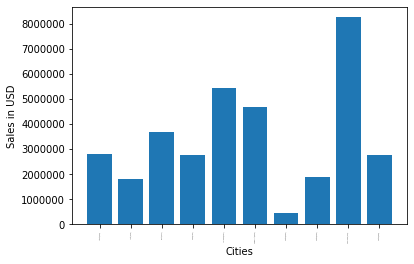

In [19]:
cities = data['City'].unique()
cities.sort()

plt.bar(cities,resultb)
plt.xticks(cities, rotation='vertical', size = 0)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

##### Qc) Find out the best time to display advertisements for maximum customer engagement.

In [20]:
resultc = data.groupby('Hour').count()
resultc

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


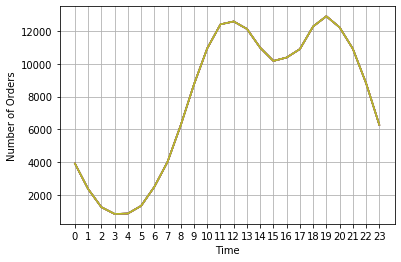

In [21]:
hours = data['Hour'].unique()
hours.sort()

plt.plot(hours, resultc)
plt.xticks(hours)
plt.xlabel('Time')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

##### Qd) Find the pair of products that are often sold together.

In [22]:
#order 1 = [Google Phone]
#order 2 = [Google Phone, headphones]
#String value google phone, usb-c 
resultd = data[data['Order ID'].duplicated(keep = False)]
resultd['Grouped'] = resultd.groupby('Order ID')['Product'].transform(lambda x: (', ').join(x))
resultd = resultd[['Order ID', 'Grouped']].drop_duplicates()
resultd

/Users/arifchu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."
...,...,...
13570,222863,"27in FHD Monitor, Bose SoundSport Headphones"
13576,222868,"iPhone, Apple Airpods Headphones"
13591,222882,"Apple Airpods Headphones, AA Batteries (4-pack)"
13594,222884,"Google Phone, USB-C Charging Cable"


In [23]:
from itertools import combinations
from collections import Counter

count = Counter()
for products in resultd['Grouped']:
    product_list = products.split(', ')
    count.update(Counter(combinations(product_list, 2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]